## Looking into some of the most unhealthy and healthy options for fast food

This is not my DATASET! This is a kaggle dataset that I found, the official dataset can be found here on [**Kaggle**](https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition)


In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [288]:
df = pd.read_csv('fastfood.csv')

In [289]:
df.head(5)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [290]:
df.columns

Index(['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar',
       'protein', 'vit_a', 'vit_c', 'calcium', 'salad'],
      dtype='object')

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [292]:
df.restaurant.unique()

array(['Mcdonalds', 'Chick Fil-A', 'Sonic', 'Arbys', 'Burger King',
       'Dairy Queen', 'Subway', 'Taco Bell'], dtype=object)

In [293]:
df.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


In [294]:
restaurant_calories = df.groupby('restaurant').calories.mean().reset_index()
print(restaurant_calories)

    restaurant    calories
0        Arbys  532.727273
1  Burger King  608.571429
2  Chick Fil-A  384.444444
3  Dairy Queen  520.238095
4    Mcdonalds  640.350877
5        Sonic  631.698113
6       Subway  503.020833
7    Taco Bell  443.652174


<AxesSubplot:title={'center':'Average Calories by Restaurant'}, xlabel='calories', ylabel='restaurant'>

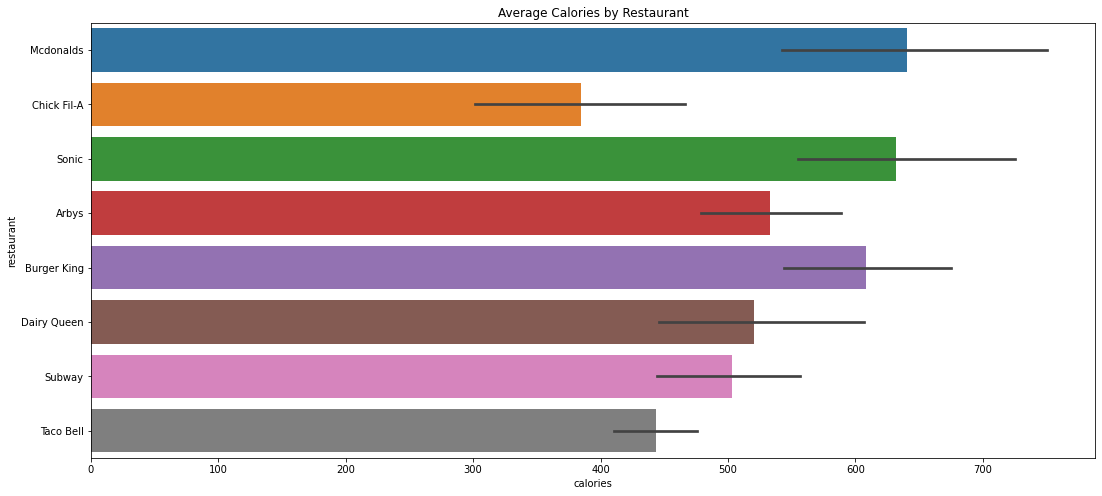

In [295]:
plt.figure(figsize=(18, 8))
plt.title('Average Calories by Restaurant')
sns.barplot(y=df['restaurant'], x=df['calories'])

In [296]:
restaurant_calories = df.groupby('restaurant').sodium.mean().reset_index()
print(restaurant_calories)

    restaurant       sodium
0        Arbys  1515.272727
1  Burger King  1223.571429
2  Chick Fil-A  1151.481481
3  Dairy Queen  1181.785714
4    Mcdonalds  1437.894737
5        Sonic  1350.754717
6       Subway  1272.968750
7    Taco Bell  1013.913043


<AxesSubplot:title={'center':'Average Sodium by Restaurant'}, xlabel='sodium', ylabel='restaurant'>

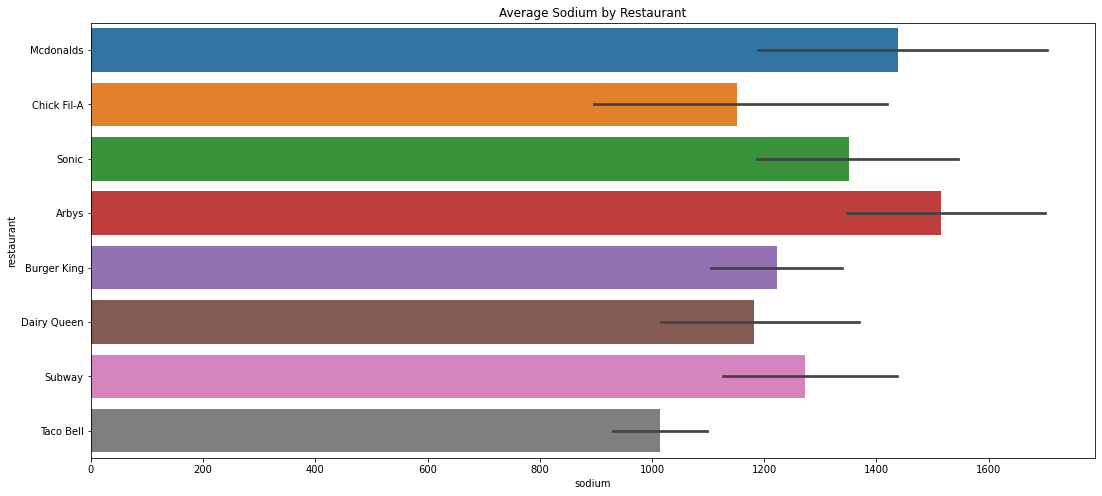

In [297]:
plt.figure(figsize=(18, 8))
plt.title('Average Sodium by Restaurant')
sns.barplot(y=df['restaurant'], x=df['sodium'])

## McDonald's "Okay" Options

According to [Global News](https://globalnews.ca/news/3615212/this-is-what-your-breakfast-lunch-and-dinner-calories-actually-look-like/#:~:text=Although%20every%20person's%20daily%20caloric,each%20for%20lunch%20and%20dinner.), the average meal should not be over 700 calories, so lets see what items at McDonalds we should be and shouldn't be eating.

<AxesSubplot:title={'center':'McDonalds Calorie Per Item'}, xlabel='calories', ylabel='item'>

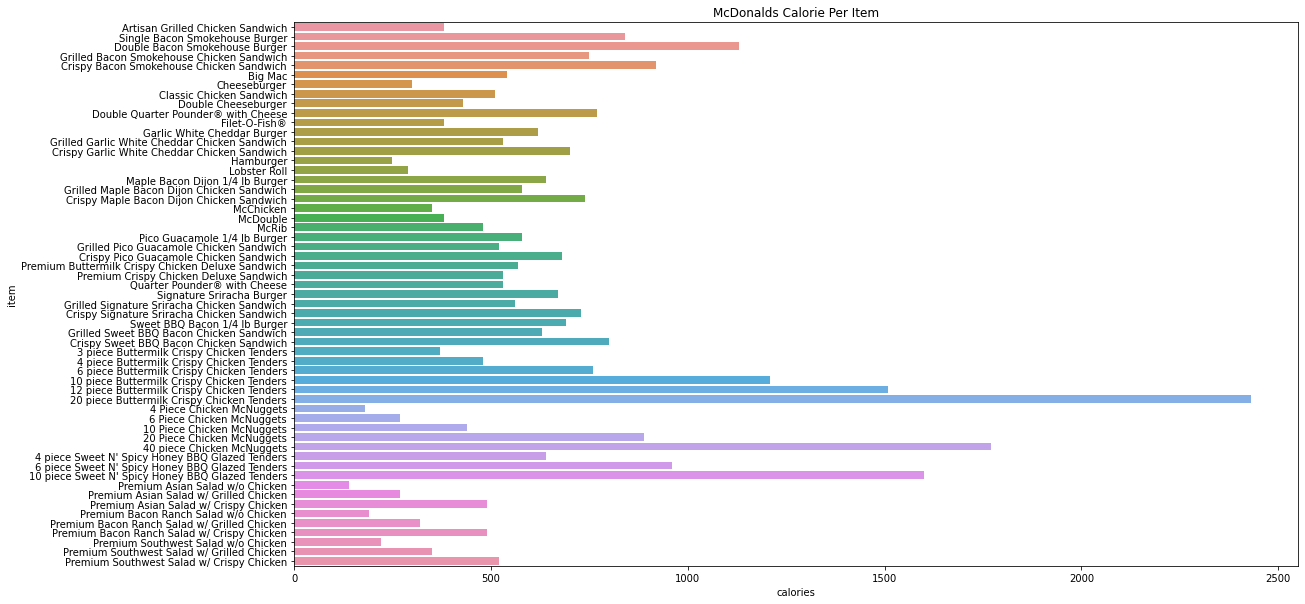

In [298]:
mcd_info = df[df['restaurant'] == 'Mcdonalds']
plt.figure(figsize=(18, 10))
plt.title('McDonalds Calorie Per Item')
sns.barplot(y=mcd_info['item'], x=df['calories'])

In [299]:
mcdonald_info = df[df['restaurant'] == 'Mcdonalds']


over700 = mcdonald_info['calories'] > 700
under700 = mcdonald_info['calories'] < 700
mcdonald_info.loc[:, 'over_700'] = over700
mcdonald_info.loc[:, 'under_700'] = under700
mcdonald_info = mcdonald_info.dropna(subset=['calories'])

C:\Users\Joe's PC\AppData\Local\Temp\ipykernel_17496\2989317217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonald_info.loc[:, 'over_700'] = over700
C:\Users\Joe's PC\AppData\Local\Temp\ipykernel_17496\2989317217.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonald_info.loc[:, 'under_700'] = under700


In [300]:
for index, row in mcdonald_info.iterrows():
    if row['calories'] < 700:
        print(f"The {row['item']} is a item that is under 700 Calories")

The Artisan Grilled Chicken Sandwich is a item that is under 700 Calories
The Big Mac is a item that is under 700 Calories
The Cheeseburger is a item that is under 700 Calories
The Classic Chicken Sandwich is a item that is under 700 Calories
The Double Cheeseburger is a item that is under 700 Calories
The Filet-O-Fish® is a item that is under 700 Calories
The Garlic White Cheddar Burger is a item that is under 700 Calories
The Grilled Garlic White Cheddar Chicken Sandwich is a item that is under 700 Calories
The Hamburger is a item that is under 700 Calories
The Lobster Roll is a item that is under 700 Calories
The Maple Bacon Dijon 1/4 lb Burger is a item that is under 700 Calories
The Grilled Maple Bacon Dijon Chicken Sandwich is a item that is under 700 Calories
The McChicken is a item that is under 700 Calories
The McDouble is a item that is under 700 Calories
The McRib is a item that is under 700 Calories
The Pico Guacamole 1/4 lb Burger is a item that is under 700 Calories
The G

## Arby's Sodium Information

According to the [**CDC**](https://www.cdc.gov/salt/reduce_sodium_tips.htm#:~:text=When%20buying%20prepared%20meals%2C%20look,to%20be%20labeled%20%E2%80%9Chealthy.%E2%80%9D) the average meal should be kept under 600 mg of sodium. Let's look into this a bit more.


<AxesSubplot:title={'center':'Arbys Sodium Per Item by Mg'}, xlabel='sodium', ylabel='item'>

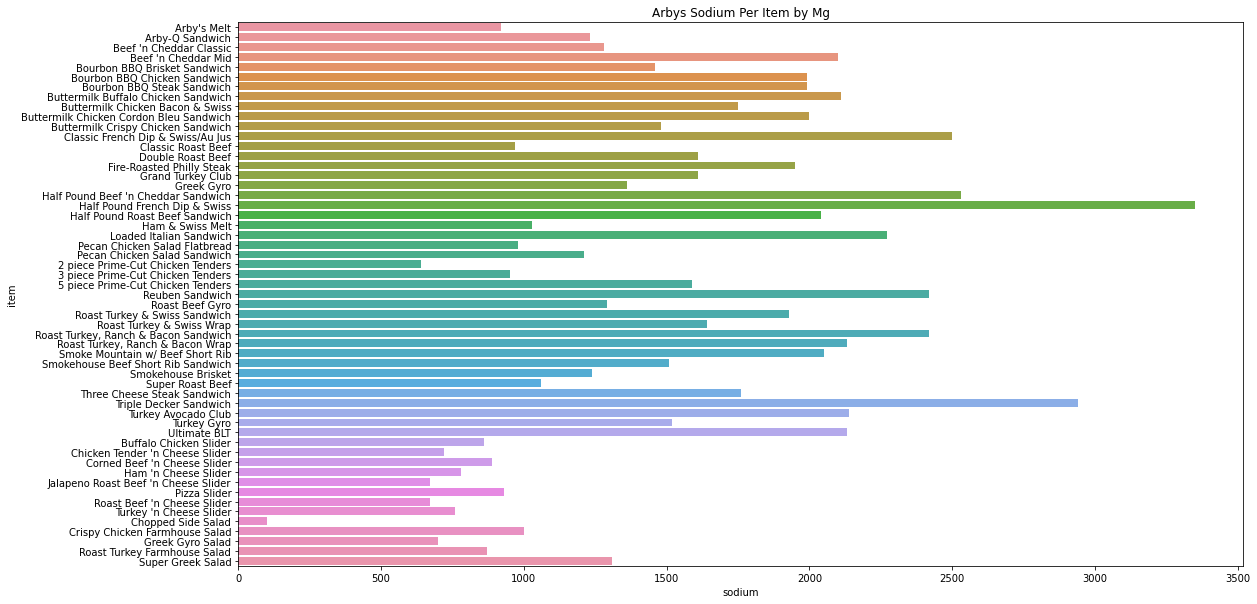

In [301]:
arbys_info = df[df['restaurant'] == 'Arbys']
plt.figure(figsize=(18, 10))
plt.title('Arbys Sodium Per Item by Mg')
sns.barplot(y=arbys_info['item'], x=df['sodium'])

### Finding and plotting the items under 600mg per serving

Lets try to find the items that are under 600mg and plot them to see the items that are "Okay" to eat

<AxesSubplot:title={'center':'Items under 600mg per serving'}, xlabel='sodium', ylabel='item'>

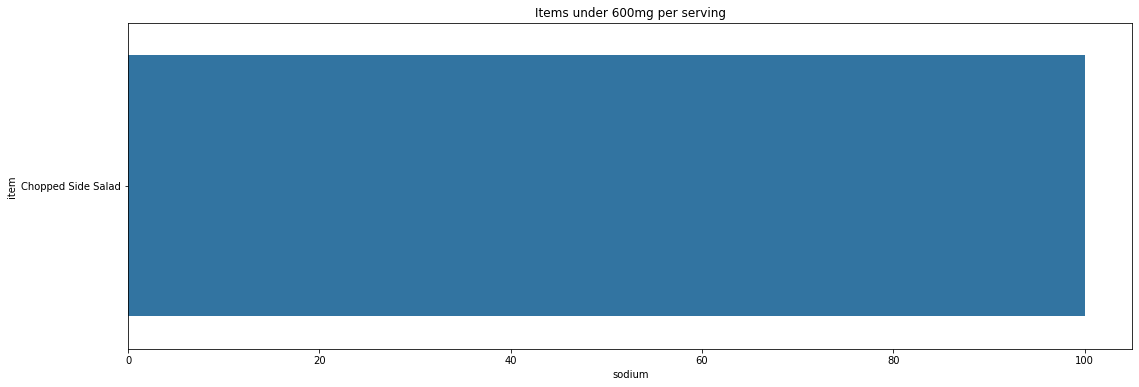

In [302]:
low_sodium_arbys = df[(df['restaurant'] == 'Arbys') & (df['sodium'] < 600)]
plt.figure(figsize=(18, 6))
plt.title('Items under 600mg per serving')
sns.barplot(y=low_sodium_arbys['item'], x=low_sodium_arbys['sodium'])

## Yikes...

Looks like they only have 1 item under 600mg of salt. 🧂 😅

## Finding The Healthies restaurant

This last part of the analysis is the most interesting. I am going to be making a scoring system and the restaurant with the highest score is the healthies.
<br>
The scoring system will be based off of 4 columns
<br>

**Column 1: Protein** If the restaurant has a item with protein of 0 - 15, it will get 1 point, if it has 16-30 it will get 2 points, if it is over 30 it will get 3 points.

**Column 2: Sugar** If the restaurant has an item with sugar amount of 0 - 16 it will get 3 points 17 - 36 will get 2 and anything over that will be 1 point

**Column 3: Calories** If the restaurant has an item range of 400 - 700 it will get 3 anything over that will get 1 

**Column 4: Sodium** If the restaurant has an item with sodium of 200-400 it will get 3 points, 401 - 600 is 2 points and anything over that is 1

Finally, lets begin (The goal of this is to find the restaurant that on AVERAGE serves the healthies items)


In [303]:
df['health_score'] = 0

In [304]:
#Getting Sodium Points
for index, row in df.iterrows():
    if (row['sodium'] >= 200) and (row['sodium'] <= 400):
        df.at[index, 'health_score'] = row['health_score'] + 3
    elif (row['sodium'] >= 401) and (row['sodium'] <= 600):
        df.at[index, 'health_score'] = row['health_score'] + 2
    else:
        df.at[index, 'health_score'] = row['health_score'] + 1

In [305]:
#Getting Protein Health Points
for index, row in df.iterrows():
    if (row['protein'] >= 0) and (row['protein'] <= 15):
        df.at[index, 'health_score'] = row['health_score'] + 1
    elif (row['protein'] >= 16) and (row['protein'] <= 30):
        df.at[index, 'health_score'] = row['health_score'] + 2
    elif (row['protein'] > 30):
        df.at[index, 'health_score'] = row['health_score'] + 3

In [306]:
#Getting Calorie Health Points
for index, row in df.iterrows():
    if (row['calories'] >= 400) and (row['calories'] <= 700):
        df.at[index, 'health_score'] = row['health_score'] + 3
    else:
        df.at[index, 'health_score'] = row['health_score'] + 1
    

In [307]:
#Getting Sugar Health Points
for index, row in df.iterrows():
    if (row['sugar'] >= 0) and (row['sugar'] <= 16):
        df.at[index, 'health_score'] = row['health_score'] + 3
    elif (row['sugar'] >= 17) and (row['sugar'] <= 36):
        df.at[index, 'health_score'] = row['health_score'] + 2
    else:
        df.at[index, 'health_score'] = row['health_score'] + 1

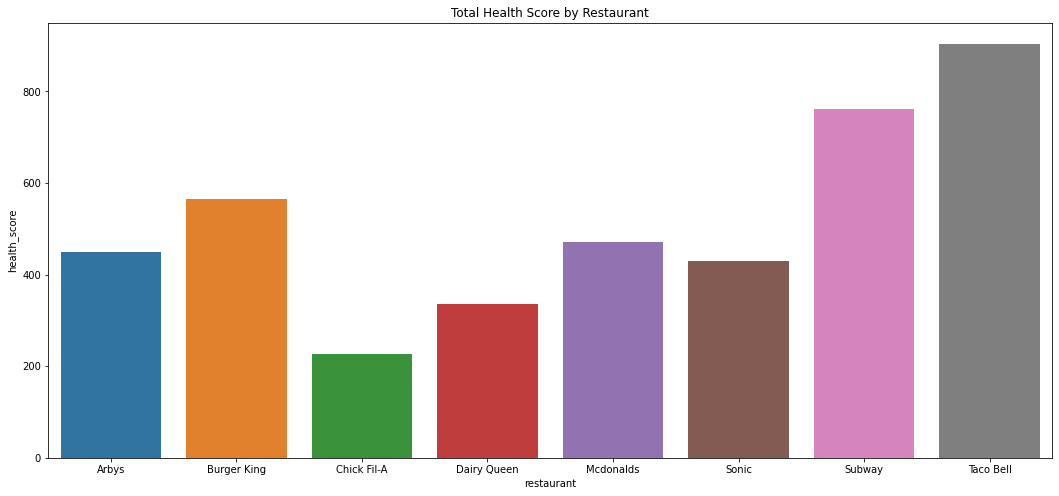

In [308]:
healthscore_by_restaurant = df.groupby('restaurant')['health_score'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(18, 8))
plt.title('Total Health Score by Restaurant')
sns.barplot(x='restaurant', y='health_score', data=healthscore_by_restaurant)
plt.show()

# Adding a Linear Regression

This is a new section in this library and I want to create a linear regression to see just how much the calories and cholesterol correlate (If they do).
It will give us a nice look at if there is a increase in calories just how much will it increase the cholesterol.

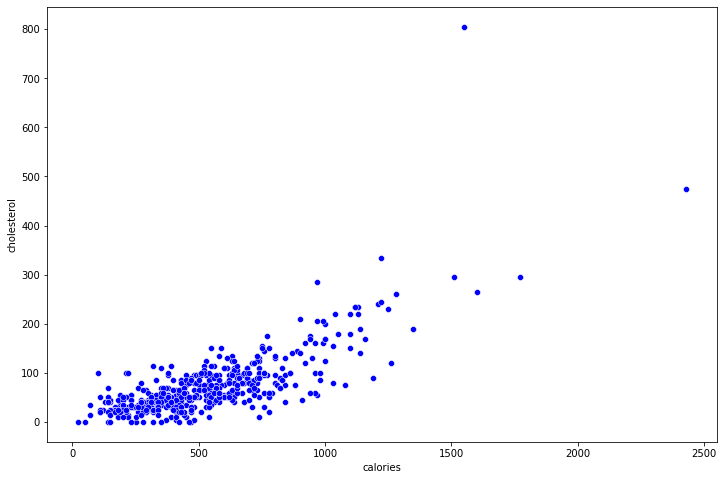

In [309]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='calories', y='cholesterol', data=df,color='blue')
plt.show()

## Findings

We can see that it appears there is a strong correlation between the two, but there is also two major outliers. For simplicity of the regression let's just remove the two outliers
This will hopefully help give a bit more accurate representation of the two.

In [310]:
# print(df[df['cholesterol'] > 750])
# print(df[df['calories'] > 2300])
df = df.drop(df.index[192])
df = df.drop(df.index[39])

**Creating the regression**
I took out the two outliers which now gives us a better look at the two sections [`Calories and Cholesterol`]

In [ ]:
# fit the linear regression model with feature names
reg = LinearRegression()
reg.fit(df[['calories']], df[['cholesterol']])

# generate the predicted values
x = np.linspace(df['calories'].min(), df['calories'].max())
y = reg.predict(x.reshape(-1,1))


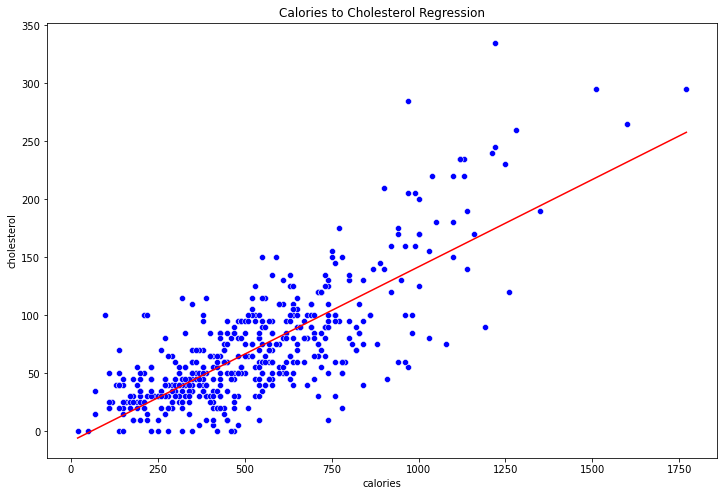

In [312]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='calories', y='cholesterol', data=df,color='blue')
plt.plot(x, y, color='red')
plt.title("Calories to Cholesterol Regression")
plt.show()

## What We Learned

Based off this very simple point system Taco Bell has the most items that are "Healthy". These items are more than likely not the best choice

but, we did learn that taco bell has the widest variety of items with SOME benefits. In addition to that we did a very basic linear regression

this helped us understand that there is some correlation between calories and cholesterol which is interesting.